In [27]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import ipywidgets as widgets
from matplotlib.patches import Rectangle

In [32]:
#Pulling in pre binned data to combine w ids

ids = np.load("../../data/spike_clusters.npy")
binned_spikes = np.load("../../data/binned_20ms.npy")
# spike_data =  pd.DataFrame(binned_spikes)
# spike_data

# To pull out stim data
stim_on_time = np.load("../../data/natImsOnTimes.npy")
stim_on_time
#to bin: divide by 20, floor
stim_binned = np.floor(stim_on_time*1000 /20)
stim_binned = np.transpose(stim_binned)
stim_ids = np.load("../../data/natImsIDs.npy") # max is 10
stims = np.vstack((stim_binned, stim_ids))
# stims = pd.DataFrame(stims)
# stims.columns = stims.iloc[0]
# stims = stims.drop(0)

# stim_ids

In [31]:
# Load binned_spikes
binned_spikes = np.load("../../data/binned_20ms.npy")

# To pull out stim data
stim_on_time = np.load("../../data/natImsOnTimes.npy")

# To bin: divide by 20, floor
stim_binned = np.floor(stim_on_time * 1000 / 20).astype(int)
stim_binned = np.transpose(stim_binned)
stim_ids = np.load("../../data/natImsIDs.npy")  # max is 10
stims = np.vstack((stim_binned, stim_ids))

# Extract time bin indices
stim_bins = stims[0]

# Initialize final_avg matrix
final_avg = np.empty((binned_spikes.shape[0], 10, 31))

for neuron_id in range(binned_spikes.shape[0]):
    stacked_bins = np.empty((len(stim_bins), 31)) 
    for stim_id in range(1,11):
        stim_indices = np.where(stims[1] == stim_id)[0]
        
        for i in stim_indices:
            bin_id = int(stim_bins[i])
            selected_columns = binned_spikes[neuron_id, bin_id - 5: bin_id + 26]
            stacked_bins[i] = selected_columns

        bin_average = np.mean(stacked_bins, axis=0)
        final_avg[neuron_id, stim_id - 1] = bin_average

final_avg

array([[[0.01666667, 0.022     , 0.02133333, ..., 0.01733333,
         0.02133333, 0.022     ],
        [0.016     , 0.02066667, 0.018     , ..., 0.016     ,
         0.016     , 0.01866667],
        [0.01333333, 0.01933333, 0.01733333, ..., 0.01333333,
         0.014     , 0.01533333],
        ...,
        [0.002     , 0.00733333, 0.00533333, ..., 0.004     ,
         0.004     , 0.006     ],
        [0.00133333, 0.00533333, 0.00333333, ..., 0.00266667,
         0.00266667, 0.002     ],
        [0.        , 0.00266667, 0.00066667, ..., 0.00133333,
         0.        , 0.        ]],

       [[0.01733333, 0.01266667, 0.01666667, ..., 0.018     ,
         0.01733333, 0.01733333],
        [0.022     , 0.016     , 0.02066667, ..., 0.02066667,
         0.02266667, 0.02      ],
        [0.02333333, 0.02      , 0.02533333, ..., 0.02466667,
         0.02533333, 0.02533333],
        ...,
        [0.05333333, 0.04466667, 0.04933333, ..., 0.05466667,
         0.05533333, 0.056     ],
        [0.0

In [ ]:
#for each neuron
    #for each stim id
        #create intermediate array stim_intermediate
        #for all of stimulus times
            #if stim id = current stim we're looking at
                #pull timeframe into stim_intermediate
        #average vertically across stim_intermediaten -> returns average for neuron a for all of stimulus x
        #add average to final array (?) 


In [61]:
tot_neuron_avg = pd.DataFrame(index = range(len(spike_data)),columns=range(-5,26))
for x in range(len(spike_data)):
# for x in range(2):

    stacked_bins = pd.DataFrame(index = range(len(stims.columns)),columns=range(-5,26))  # Initialize an empty DataFrame
    
    for i in range(len(stims.columns)):

        bin_id = int(stims.columns[i])

        # Select the columns of the time snippet we are using
        selected_columns = spike_data.iloc[x, bin_id - 5: bin_id + 26].to_frame().T  # Transpose to have one row with 31 columns
        selected_columns.columns = range(-5,26) # Rename the columns for proper concatenation

        # Concatenate vertically to stacked_bins
        stacked_bins.loc[i] = selected_columns.iloc[0]

        # Now average_across_bins should have 31 columns, each corresponding to a selected range of columns from spike_data
    bin_average = stacked_bins.mean(axis=0).to_frame().T

    # Concatenate vertically to tot_neuron_avg
    tot_neuron_avg.loc[x] = bin_average.iloc[0]
tot_neuron_avg

,-5,-4,-3,-2,-1,0,1,2,3,4,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.002667,0.000667,0.000667,0.001333,0.000667,0.000667,0.002,0.000667,0.0,...,0.000667,0.000667,0.000667,0.001333,0.0,0.002,0.0,0.001333,0.0,0.0
1,0.065333,0.054,0.058667,0.051333,0.057333,0.063333,0.058,0.054,0.060667,0.069333,...,0.058,0.068,0.06,0.058667,0.055333,0.065333,0.056,0.061333,0.065333,0.063333
2,0.005333,0.008,0.008,0.004667,0.004,0.002667,0.006,0.004,0.005333,0.005333,...,0.004,0.003333,0.003333,0.004667,0.005333,0.003333,0.002667,0.002,0.006667,0.002667
3,0.001333,0.004,0.002667,0.002667,0.001333,0.000667,0.001333,0.001333,0.002667,0.002667,...,0.002667,0.002,0.002667,0.002,0.002,0.002,0.001333,0.000667,0.004,0.001333
4,0.340667,0.324,0.309333,0.284667,0.312667,0.314,0.310667,0.292,0.312,0.324667,...,0.310667,0.296667,0.319333,0.352667,0.316,0.335333,0.316667,0.324,0.330667,0.325333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,0.017333,0.016,0.009333,0.012,0.014667,0.010667,0.016,0.018,0.017333,0.017333,...,0.017333,0.014667,0.016,0.006667,0.013333,0.014667,0.012,0.014,0.015333,0.018
775,0.003333,0.002667,0.002667,0.004,0.002667,0.001333,0.003333,0.003333,0.003333,0.004,...,0.004667,0.001333,0.007333,0.002667,0.002667,0.002,0.002667,0.001333,0.006,0.004
776,0.001333,0.001333,0.002,0.001333,0.000667,0.002,0.002,0.001333,0.001333,0.002667,...,0.0,0.002,0.002,0.000667,0.000667,0.0,0.0,0.002667,0.002,0.002
777,0.003333,0.003333,0.004667,0.003333,0.002,0.003333,0.004667,0.003333,0.004,0.003333,...,0.002667,0.002667,0.006667,0.007333,0.008667,0.006,0.002667,0.001333,0.006667,0.002


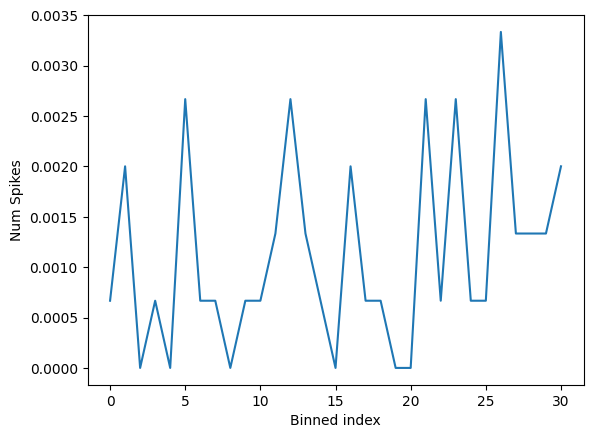

In [69]:

# Assuming combined is your DataFrame
y = tot_neuron_avg.loc[664].to_list()  # Adjusted slicing indices
#x = [i * 20 for i in x]
 # Adjusted slicing indices

plt.plot(y)
plt.xlabel('Binned index')
plt.ylabel('Num Spikes')
# plt.title('Stimulus id:{}, bin: {}'.format(stim_id, bin_id))

# Add the gray rectangle
# plt.axvspan(bin_id, bin_id + 15, color='gray', alpha=0.5)

plt.show()


In [63]:
tot_neuron_avg.to_csv("../../data/tot_neuron_avg.csv")

In [14]:
# Combining the dfs
combined = spike_data.merge(stims, how = "outer")
combined = combined.rename(index={799: 'stim'})
combined

,0,1,2,3,4,5,6,7,8,9,...,161525,161526,161527,161528,161529,161530,161531,161532,161533,161534
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


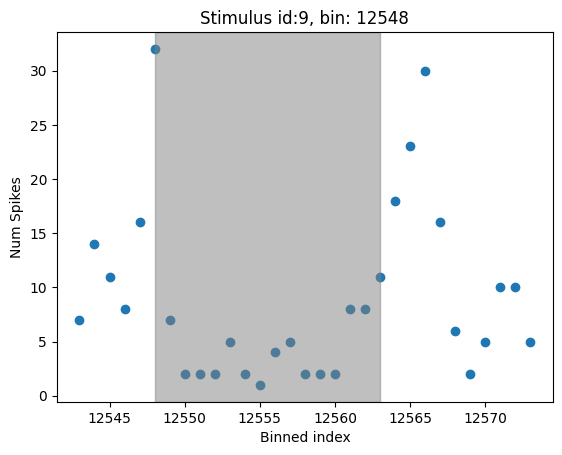

In [15]:
bin_id = 12548
stim_id = int(combined.iloc[779,bin_id])
# Assuming combined is your DataFrame
x = combined.columns[bin_id - 5: bin_id + 26].to_list()  # Adjusted slicing indices
#x = [i * 20 for i in x]
y = combined.iloc[:, bin_id - 5: bin_id + 26].sum().to_list()  # Adjusted slicing indices

plt.scatter(x, y)
plt.xlabel('Binned index')
plt.ylabel('Num Spikes')
plt.title('Stimulus id:{}, bin: {}'.format(stim_id, bin_id))

# Add the gray rectangle
plt.axvspan(bin_id, bin_id + 15, color='gray', alpha=0.5)

plt.show()


In [3]:
allen = pd.read_csv("../../data/allen_visual_behavior_firing_rate.csv")
allen = allen.iloc[::400]


In [133]:
def slope_viz_neurons(t=0):
    t = int(t)
    if t<25:
        x = spike_data.columns[0:25].to_list()
        y = spike_data.iloc[:,0:25].sum().to_list()
    else:
        x = spike_data.columns[t-50:t+50].to_list()
        y = spike_data.iloc[:,t-50:t+50].sum().to_list()
    plt.scatter(x, y, label='Spikes')
    plt.axvline(t, color='red', linestyle='--',)
    plt.xlabel('Time(in 20ms bins)')
    plt.ylabel('Num Spikes')
    plt.legend()
    plt.show()
    print(len(x))
    print(len(y))

probably smoother to have the line move than to have the entire graph move, maybe pass in edges of the graphs as parameters?
def add more widget functions to the ui to clean it up
need to combine with image dataset, maybe transparent boxes or something?
should data be put into bigger bins?

In [134]:
slider = widgets.FloatSlider(value=0.0, min=0.0, max=500.0, step=5.0, description='Time')
slider.layout.width = "100%"
widgets.interact(slope_viz_neurons, t=slider)

interactive(children=(FloatSlider(value=0.0, description='Time', layout=Layout(width='100%'), max=500.0, step=…

<function __main__.slope_viz_neurons(t=0)>